In [1]:
from lad_utils import *
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

# HMM predictions

In [2]:
chipseq_data = 'h3k9me2_processed_chipseq_data/' # location of bedgraph and bigwig files for all cell types used in final analyses

In [7]:
kdd_hmm_out = 'H3K9me2_HMM_predictions' # where to save predictions


for n_states in range(2,6,1):
    
    dfs = []
    
    for ct in all_cts:
        df = hmm_predict(ct, 
                         f'H3K9me2_trained_HMMs/{n_states}_state_H3K9me2_HMM.json', 
                         chipseq_data,
                         print_status_updates=False)
        df['cell_type'] = ct
        dfs.append(df)


    alldfs = pd.concat(dfs, sort=False)

    alldfs.to_csv(f'{kdd_hmm_out}/H3K9me2_dat_{n_states}state.tsv',
                 sep='\t', index=False)

# save to BED files

In [2]:
n_states = 2

h3k9me2_dat = pd.read_table(f'H3K9me2_HMM_predictions/H3K9me2_dat_{n_states}state.tsv')

save_dat_to_bed(h3k9me2_dat, ['nonKDD','KDD'],
               'KDDs_2state', encode_blacklist)

In [2]:
n_states = 3

h3k9me2_dat = pd.read_table(f'H3K9me2_HMM_predictions/H3K9me2_dat_{n_states}state.tsv')

save_dat_to_bed(h3k9me2_dat, ['nonKDD','T2KDD','T1KDD'],
               f'KDDs_{n_states}state', encode_blacklist)

In [3]:
n_states = 4

h3k9me2_dat = pd.read_table(f'H3K9me2_HMM_predictions/H3K9me2_dat_{n_states}state.tsv')

save_dat_to_bed(h3k9me2_dat, ['nonKDD','T3KDD','T2KDD','T1KDD'],
               f'KDDs_{n_states}state', encode_blacklist)

In [4]:
n_states = 5

h3k9me2_dat = pd.read_table(f'H3K9me2_HMM_predictions/H3K9me2_dat_{n_states}state.tsv')

save_dat_to_bed(h3k9me2_dat, ['nonKDD','T4KDD','T3KDD','T2KDD','T1KDD'],
               f'KDDs_{n_states}state', encode_blacklist)

# compare fit with AIC and BIC

In [2]:
h3k9me2_dat = pd.read_table(f'H3K9me2_HMM_predictions/H3K9me2_dat_2state.tsv')

cell_types = []
n_states_list = []
log_probs = []

cols = ['score0','score1']

for n_states in range(2, 6, 1):
    with open(f'H3K9me2_trained_HMMs/{n_states}_state_H3K9me2_HMM.json') as json_file:
        model = HiddenMarkovModel.from_json(json.load(json_file))
    for ct in all_cts:
        lp = model.log_probability(h3k9me2_dat.query('cell_type == @ct')[cols].to_numpy())
        cell_types.append(ct)
        n_states_list.append(n_states)
        log_probs.append(lp)
        
tog = pd.DataFrame({
    'cell_type':cell_types,
    'n_states':n_states_list,
    'log_probs':log_probs
})

tog['AIC'] = tog.apply(lambda row: AIC(row), axis=1)

tog['BIC'] = tog.apply(lambda row: BIC(row), axis=1)

Text(0.5, 0, 'cell type')

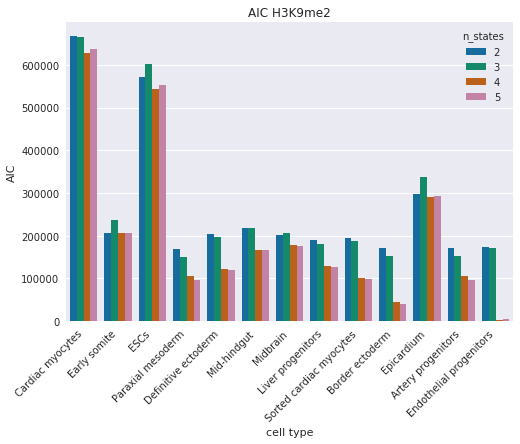

In [3]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

p = sns.barplot(y='AIC', x='cell_type', data=tog.replace(ct_replace),
           hue='n_states')
plt.xticks(rotation=45, ha='right')
plt.title('AIC H3K9me2')
plt.xlabel('cell type')

In [4]:
p.get_figure().savefig('../figs/SF11_aic_h3k9me2_low_res.png',
         dpi=100, bbox_inches='tight')